In [1]:
# Some common packages used throughout the notebook
%load_ext autoreload
%autoreload 2

# Import the NumPy module
import numpy as np

# Convient for outputting dictionaries
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from satsense.util import load_from_file, normalize_image, get_rgb_bands

# Supported image formats include RGB, Quickbird and Worldview
from satsense.util import RGB, QUICKBIRD, WORLDVIEW2

# URI to the image
imagefile = '/home/bweel/Documents/projects/dynaslum/data/satelite/056239125010_01/056239125010_01_P001_MUL/08NOV02054348-M2AS_R1C1-056239125010_01_P001.TIF'
# Set the correct format here, it is used throughout the notebook
bands = QUICKBIRD

# Loading the file
dataset, image = load_from_file(imagefile)
normalized_image = normalize_image(image, bands)

In [3]:
from satsense.extract import CellGenerator
from math import ceil, floor

cell_size = [25, 25]
rows, cols = normalized_image.shape[0:2]

y_cells = floor(rows / cell_size[0])
x_cells = floor(cols / cell_size[1])

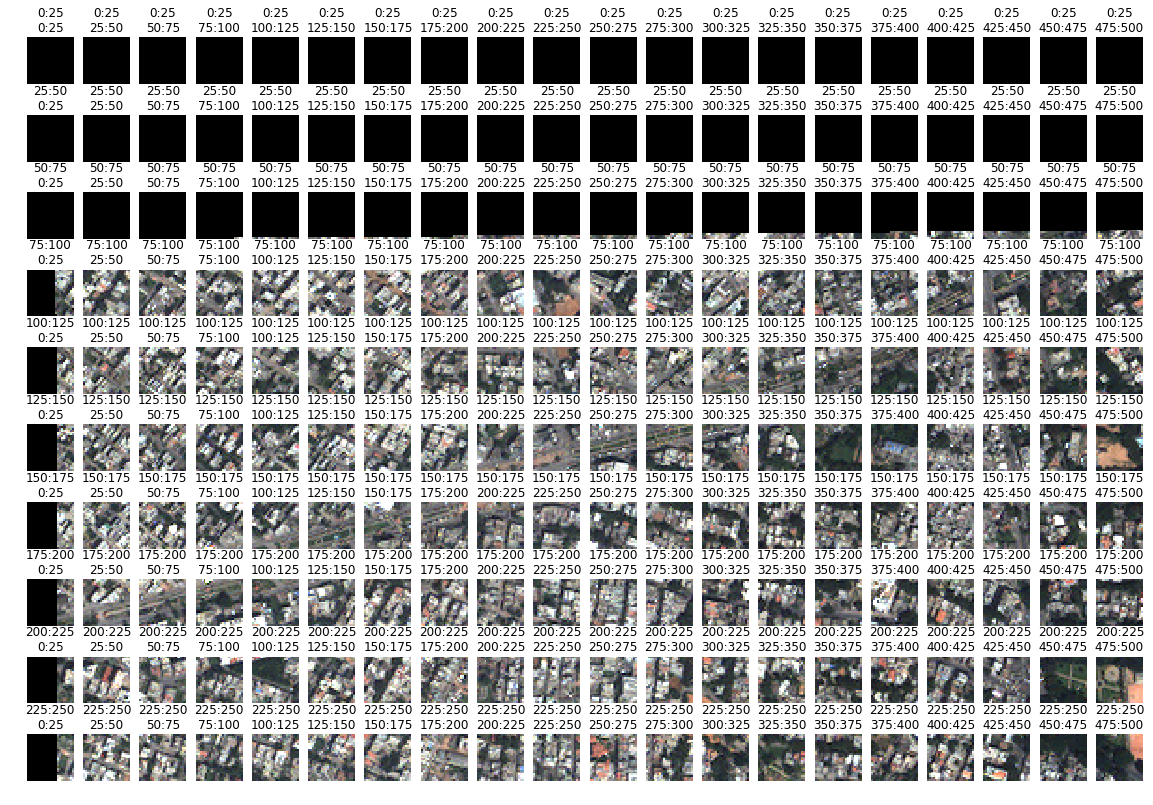

In [4]:
rgb_image = get_rgb_bands(normalized_image, bands)

generator = CellGenerator(rgb_image, 25, x_length=10, y_length=20)
fig, axes = plt.subplots(10, 20, figsize=(20, 14), sharex=True, sharey=True)

for cell in generator:
    i = cell.x
    j = cell.y
    axes[i,j].axis('off')
    axes[i,j].imshow(cell.window)
    axes[i,j].set_title('{0}:{1}\n{2}:{3}'.format(cell.x_range.start, cell.x_range.stop, cell.y_range.start, cell.y_range.stop))
    axes[i,j].set_adjustable('box-forced')

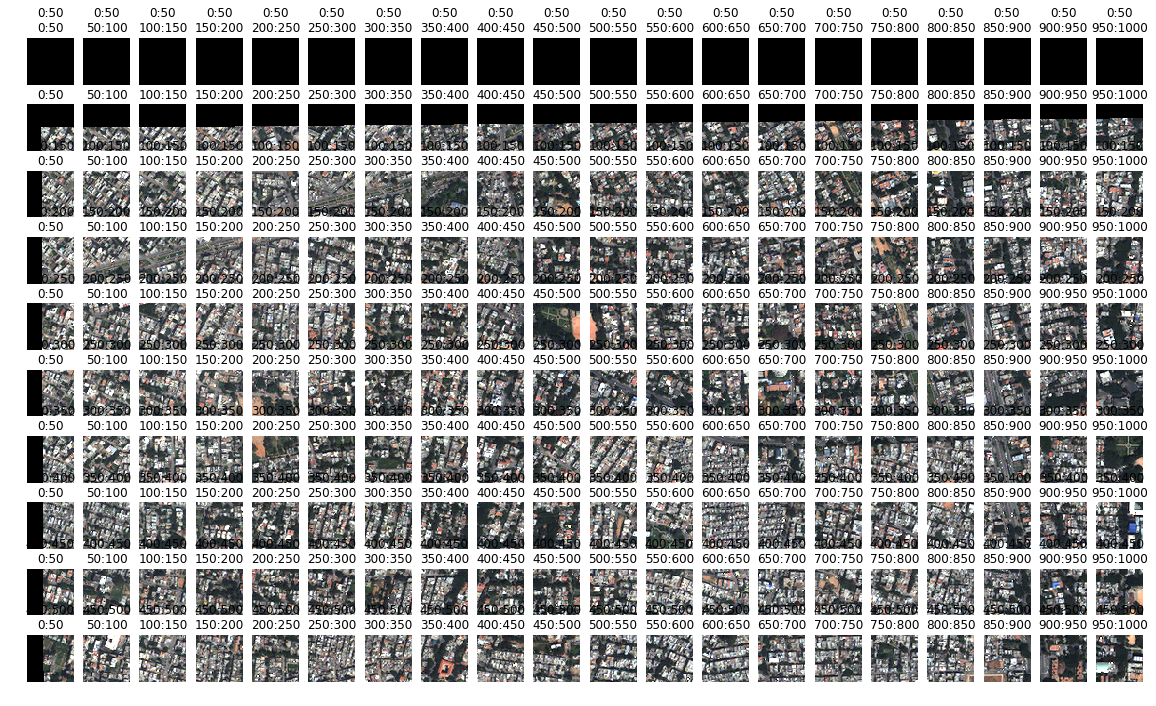

In [5]:
rgb_image = get_rgb_bands(normalized_image, bands)

generator = CellGenerator(rgb_image, 50, x_length=10, y_length=20)
fig, axes = plt.subplots(10, 20, figsize=(20, 12), sharex=True, sharey=True)

for i, j, x_range, y_range, window in generator:
    # print(i, j, x_range, y_range)
    axes[i,j].axis('off')
    axes[i,j].imshow(window)
    axes[i,j].set_title('{0}:{1}\n{2}:{3}'.format(x_range.start, x_range.stop, y_range.start, y_range.stop))
    axes[i,j].set_adjustable('box-forced')

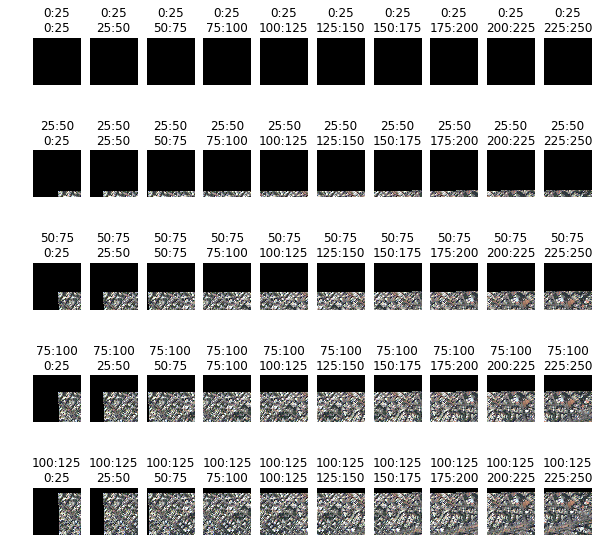

In [6]:
from satsense.extract import SuperCell

rgb_image = get_rgb_bands(normalized_image, bands)

generator = CellGenerator(rgb_image, 25, x_length=5, y_length=10)
fig, axes = plt.subplots(5, 10, figsize=(10, 10), sharex=True, sharey=True)

for cell in generator:
    # print(i, j, x_range, y_range)
    i = cell[0]
    j = cell[1]
    c = SuperCell(rgb_image, cell, 100, padding=True)
    axes[i,j].axis('off')
    axes[i,j].imshow(c.window)
    axes[i,j].set_title('{0}:{1}\n{2}:{3}'.format(cell.x_range.start, cell.x_range.stop, cell.y_range.start, cell.y_range.stop))
    axes[i,j].set_adjustable('box-forced')


In [5]:
from satsense.features import Pantex, NirNDVI
from satsense import extract_features

features = [
    Pantex(windows=(25, 100, 200)),
    NirNDVI(windows=(25,))
]

feature_set = extract_features(normalized_image, features, bands, x_length=5, y_length=10)


print(feature_set[:, :, features[0].indices])

Total length found:  4
Feature vector:
(5, 10, 4)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices